# Обзор типов визуализации

##### ЛИНЕЙНЫЙ ГРАФИК (LINEPLOT)
***

**Линейный график** представляет собой последовательность точек, соединённых линией. Каждая точка — это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае).

С его помощью можно отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций.

Он позволяет выявить тенденцию движения показателя и найти ключевые точки его роста или падения.

ПРИМЕР:

Ниже представлен график динамики продаж видеоигр в зависимости от региона. По оси ординат отложено число проданных дисков с видеоиграми (в миллионах) в различных регионах (NA — Северная Америка, EU — Европа, JP — Япония, Other — другие регионы, Global — во всём мире), по оси абсцисс — год выпуска игры.

![Линейный график](https://lms.skillfactory.ru/assets/courseware/v1/d9773aabe199b6c0261235b32cc10d57/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_2.png "Линейный график")

Из графика отчётливо виден рост числа продаж видеоигр по всем рынкам примерно до 2007 года, после чего наблюдается резкий спад и неизбежное приближение числа продаж к 0 в 2020 году. Вполне объяснимое явление: именно в этот период наступает эра интернет-магазинов видеоигр и люди постепенно уходят от дисковых накопителей.

На графике можно отследить лидеров продаж, то, как они менялись, какие страны влияют на общие продажи, где абсолютный и относительный прирост продаж в динамике выше, а где — ниже.

Text(0, 0.5, 'Суммарный объём продаж')

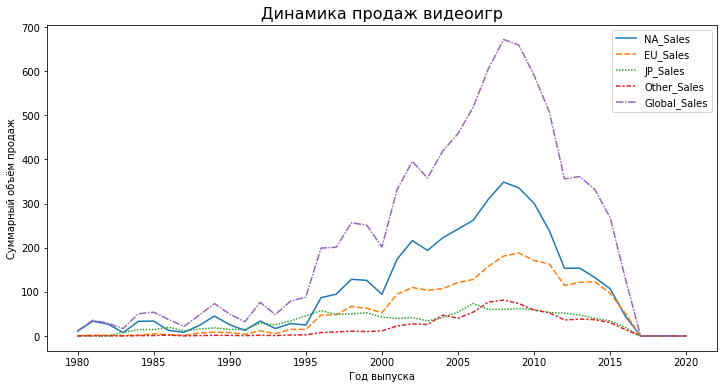

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

##### ГИСТОГРАММА (HISTOGRAM)
***

**Гистограмма** — это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x.

Ось разбита на интервалы, их ещё называют **корзинами (bins)**, их число задаётся пользователем. Ширина интервалов одинакова и задаёт ширину прямоугольника.

Мы можем понять, как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.

ПРИМЕР:

Ниже приведено два вида гистограмм с общей осью.

Верхняя гистограмма описывает общее распределение стоимости недвижимости в Мельбурне. Весь диапазон цен разбит на 30 равных интервалов. На каждом интервале строится прямоугольник, его высота — число объектов, стоимость которых лежит в этом интервале.

Нижняя гистограмма описывает то же распределение, но с учётом типов недвижимости. Здесь число объектов, попавших в корзину, обозначается интенсивностью цвета: чем темнее полоса, тем больше в данных объектов с ценой из этого интервала.

![Гистограмма](https://lms.skillfactory.ru/assets/courseware/v1/7cd002ab281b7ae6dafc4689ed561945/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_3.png "Гистограмма")

Основная часть цен на объекты сосредоточена в интервале от  0.1 до 2 млн, и наибольшее число цен лежит в интервале от 0.9 до 1.2 млн (самый высокий прямоугольник). Далее при повышении цены количество объектов только падает, что вполне соответствует жизненным реалиям — дорогих и роскошных домов гораздо меньше, чем домов среднего ценового сегмента. Забегая вперёд, в тему теории вероятности, скажем, что данная гистограмма очень напоминает логарифмическое нормальное распределение. Такой вид распределения очень распространён на практике.

Во-вторых, как видно из нижней гистограммы, объекты типа house (h) имеют схожее с общим распределение — их максимальная частота также наблюдается в третьем интервале, после чего идёт постепенное падение частоты (бледные полосы на высоких значениях цен). Цены на объекты типов unit (u) не превышают 4 млн, и их максимум наблюдается во втором интервале. Таунхаусы (t) имеют почти одинаковую частоту в каждом ценовом сегменте.


Text(0, 0.5, 'Тип объекта')

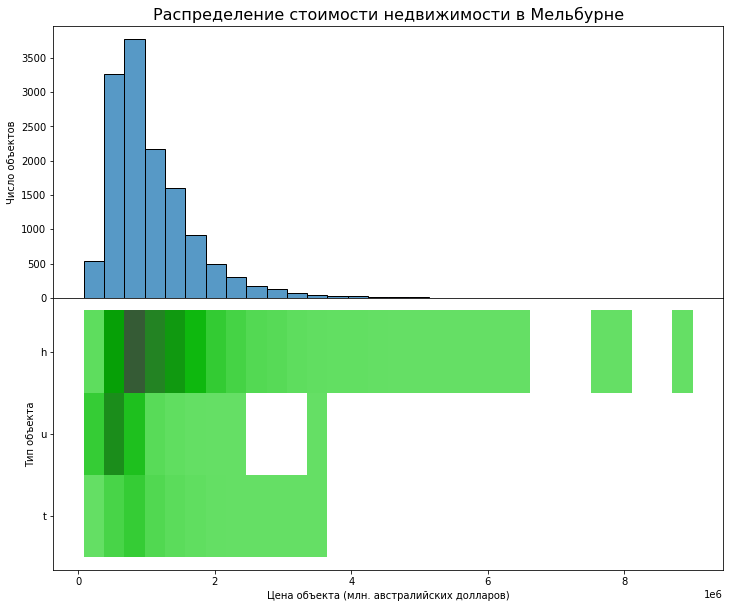

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

##### ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)
***

Другое название этого графика — **точечная диаграмма**.

График представляет собой облака точек: по оси абсцисс откладывается одна числовая переменная, по оси ординат — вторая, а каждая точка на графике — это запись из таблицы.

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя *числовыми* переменными. Однако через настройки графика в исследование зависимости можно добавить и несколько *категориальных* переменных.

С их помощью мы можем увидеть, как зависит (или не зависит) давление от возраста пациента, объём продаж товаров от количества показанной рекламы и т. д.

Оценив взаимосвязь признаков, мы можем принять решение об использовании какого-то из признаков для предсказания.

ПРИМЕР:

Окунёмся немного в орнитологию. На диаграмме рассеяния ниже показана зависимость длины крыльев пингвинов от длины их клюва в миллиметрах. При этом цвет точки на графике зависит от вида пингвина, а размер точки — от пола птицы. Итого на одном графике уместилась зависимость сразу между четырьмя признаками! И это ещё не предел.

![Гистограмма](https://lms.skillfactory.ru/assets/courseware/v1/eb68a65ad5e5eebdb8c4024871fa3264/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_4.png "Гистограмма")

##### КРУГОВАЯ ДИАГРАММА (PIE CHART)
***

Синонимичные названия диаграммы — **пироговая** диаграмма и **секторная** диаграмма.

Круговая диаграмма представляет собой круг, разделённый на секторы. Весь круг составляет 100 %. Каждый из секторов отображает долю одной из категорий в данных, размер сектора соответствует части целого от круга.

Диаграмма является способом визуализации для *категориального* признака: например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец.

Круговые диаграммы наглядны, когда нужно показать, как делится на части что-либо целое: например, так можно визуализировать вклад каждого из продавцов в выручку магазина. Однако круговые диаграммы *неудобны, когда рассматривается больше одного признака* — в этом случае приходится добавлять отдельную диаграмму. Из-за большей информативности столбчатых диаграмм специалисты склонны выбирать именно их.

ПРИМЕР:

Перед вами диаграмма количества погибших главных и второстепенных персонажей в сериале «Игра престолов» в зависимости от их верности какому-либо из домов. На диаграмме изображены названия семи домов (None — персонаж не принадлежал к определённому дому), а внутри секторов указано количество погибших персонажей в процентах.

![Круговая диаграмма](https://lms.skillfactory.ru/assets/courseware/v1/3fe06c6fc17b37e294664418b147bc25/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_7.png "Пироговая или секторная диограмма")

Из представленной диаграммы видно, что большинство погибших в сериале персонажей не принадлежали ни к одному из домов. На популярный вопрос «Кого чаще убивают, верных Старкам или Ланнистерам?» однозначного ответа нет, группы приблизительно одинаковы.

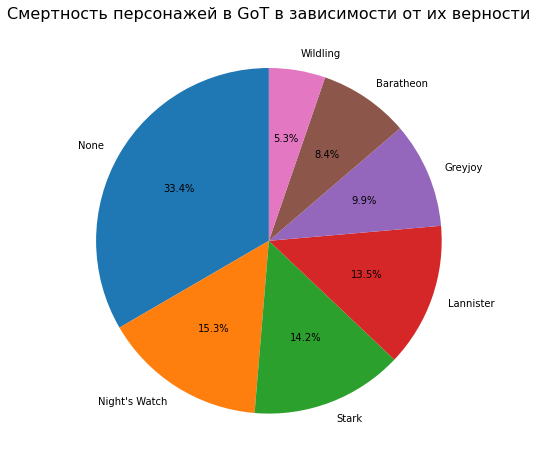

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

game_of_thrones_df = pd.read_csv('data/got/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

##### СТОЛБЧАТАЯ ДИАГРАММА (BAR CHART)
***

Столбчатая диаграмма также максимально проста: по оси x откладывается некоторый *категориальный* признак, для каждой категории которого рассчитан некоторый *показатель* (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя.

Основное применение столбчатых диаграмм в Data Science — сравнение категорий друг с другом. Например, сравнение ресторанов по суммарной прибыли, сравнение средних расходов пользователей, сравнение медианной стоимости квартир по районам и т. д.

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать *совместное распределение* показателей, тем самым повышая информативность. Такие диаграммы называются **многоуровневыми**.

ПРИМЕР:

В качестве примера приведём две диаграммы стоимости женского нижнего белья на сайте Amazon.

На левой диаграмме изображены средние цены товаров для каждого бренда. На правой диаграмме изображены те же цены, но с разделением цветом по категориям товаров (Bras — бюстгальтеры, Panties — трусы). Правая диаграмма является многоуровневой столбчатой диаграммой.

![Столбчатая диаграмма](https://lms.skillfactory.ru/assets/courseware/v1/3bd8e6fc42f921d59942a615f6cc6552/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_8.png "Столбчатая диограмма")

Из левой диаграммы видно, что наибольшую среднюю цену имеют товары бренда Compression-Comfort, а наименьшую — Lucky-Brand.

Из правого графика можно заметить, что средняя цена трусов всегда ниже средней цены бюстгальтеров.

Кроме того, для некоторых брендов в данных есть информация только о бюстгальтерах или только о трусах (их столбцы окрашены только синим или только оранжевым цветом).

C:\Users\Роман\AppData\Local\Temp\ipykernel_13236\192481839.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')


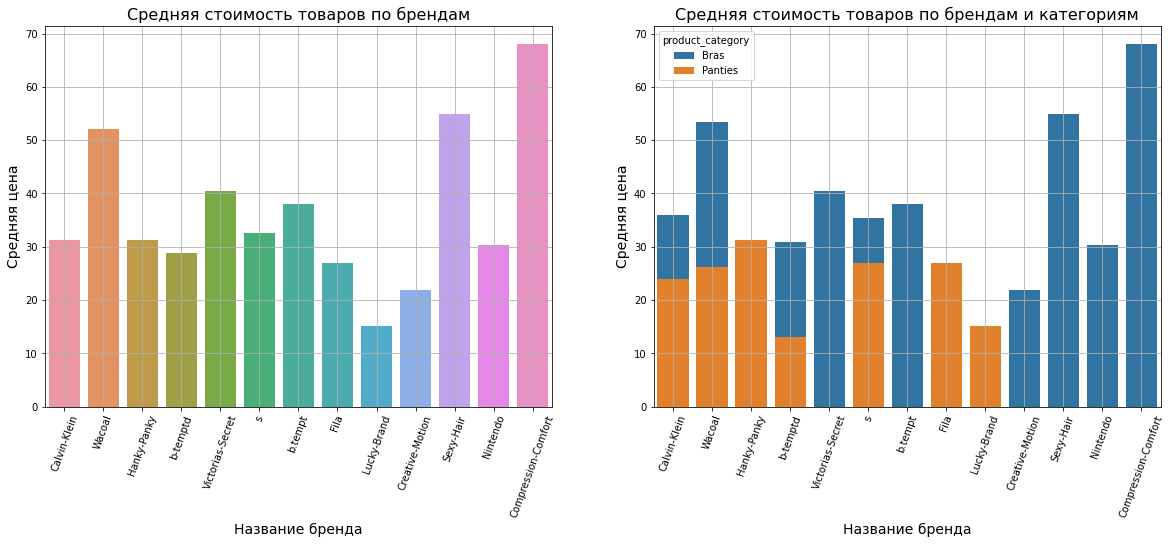

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

##### ГИСТОГРАММЫ И СТОЛБЧАТЫЕ ДИАГРАММЫ: РАЗЛИЧИЯ
***


In [10]:
import pandas as pd
from IPython.display import display

hist_vs_barchart_df = pd.DataFrame({
    'ПРИЗНАК': ['Что показывают?', 'Число столбцов', 'Размещение столбцов', 'Пример применения'],
    'ГИСТОГРАММА': ['Распределение числового признака (как часто значения признака попадают в каждый из выделенных интервалов)', 'Задаётся пользователем', \
        'Непрерывно', 'Распределение размера заработной платы в России (от 20 тысяч, от 21 до 40 тысяч, от 41 до 60 тысяч…)'],
    'СТОЛБЧАТАЯ ДИАГРАММА': ['Сравнение категорий признака по заданному показателю', 'Равно числу категорий', \
        'Дискретно', 'Средняя заработная плата по отраслям экономики, субъектам РФ, полу и прочее']
})
display(hist_vs_barchart_df)

,ПРИЗНАК,ГИСТОГРАММА,СТОЛБЧАТАЯ ДИАГРАММА
0,Что показывают?,Распределение числового признака (как часто зн...,Сравнение категорий признака по заданному пока...
1,Число столбцов,Задаётся пользователем,Равно числу категорий
2,Размещение столбцов,Непрерывно,Дискретно
3,Пример применения,Распределение размера заработной платы в Росси...,Средняя заработная плата по отраслям экономики...


##### ТЕПЛОВАЯ КАРТА (HEATMAP)

**Тепловая карта** — это графическое представление некоторой таблицы, где значения в ячейках выделяются определённым цветом или интенсивностью цвета. Таблицей может быть как *DataFrame*, так и, например, *изображение*.

Способы применения тепловых карт разнообразны: от визуализации категорий объектов на изображениях до графического представления матриц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

ПРИМЕР:

Ниже представлена тепловая карта ежедневной активности в Twitter Дональда Трампа и Джо Байдена перед американскими президентскими выборами в 2020 году.

На оси абсцисс отложены минуты, а на оси ординат — часы. Квадраты тепловых карт окрашены в соответствии с тем, сколько твитов было выложено кандидатами в каждую часовую/минутную ячейку за указанный период. Сбоку находится легенда, которая показывает соотношения цвета и количества твитов.

![Тепловая карта](https://lms.skillfactory.ru/assets/courseware/v1/c00509e551230cacd94480782818d467/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_10.png "Тепловая карта")

Тёмная полоса, соответствующая первой половине дня, говорит о том, что оба кандидата не заходят в Twitter по утрам.

У Дональда Трампа тепловая карта намного ярче, чем у Джо Байдена, что говорит о том, что Трамп выкладывает твиты намного чаще.

Кроме того, можно сказать, что Байден предпочитает посещать соцсети в конце дня — основная масса его твитов сделана после семи часов вечера.

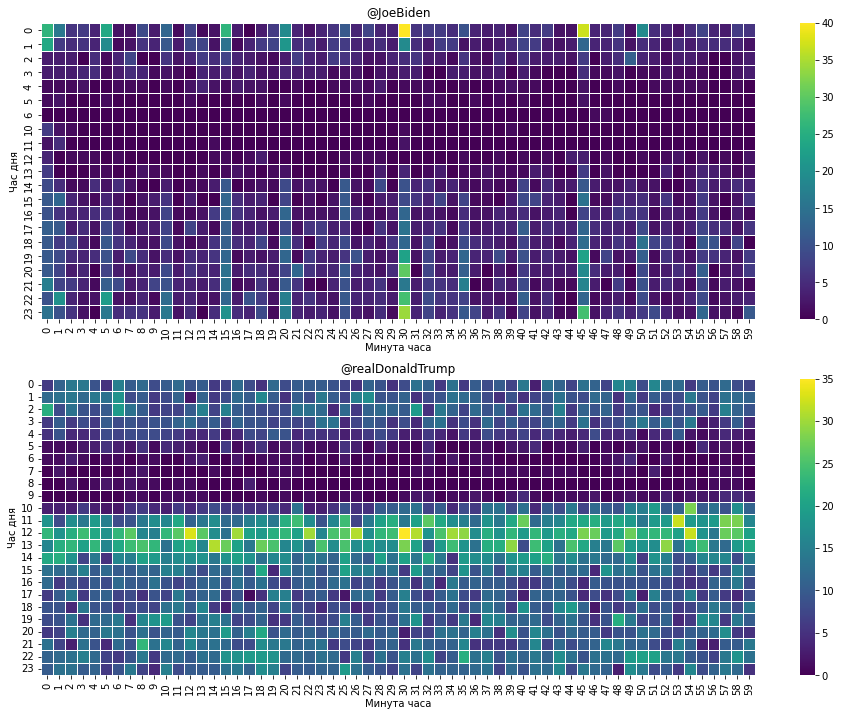

In [11]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

##### КОРОБЧАТАЯ ДИАГРАММА (BOXPLOT, BOX AND WHISKER PLOT)

Синонимичные названия диаграммы — **ящик с усами** и **диаграмма размаха**.

**Коробчатые диаграммы**, которые были введены в употребление Джоном Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии *квантилей*.

Приведём общую схему построения диаграммы:

![Общая схема коробчатой диаграммы](https://lms.skillfactory.ru/assets/courseware/v1/0c4dfd2ac8da2e43b7c7e9b726b321a4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_5.png "Коробчатая диаграмма")

Для построения коробчатой диаграммы надо знать три характеристики:

— Q25 - 25 % квантиль;  
— Q50 - 50 % квантиль, или медиана;  
— Q75 - 75 % квантиль.  

Основные составляющие графика:

1
Ящик, или коробка. Левая граница коробки соответствует значению Q25, правая — Q75, а линия внутри коробки — медиане. Ширина ящика называется *межквартильным размахом* (Interquartile range) и вычисляется как:

*IQR = Q75 - Q25*

2
Усы ящика, длина которых равна 1.5\*IQR. Крайние точки усов часто обозначаются в литературе как min и max и называются *границами распределения*. Фактически эти точки не всегда являются истинными минимумом и максимумом признака.

3
*Потенциальные выбросы* — точки, лежащие за пределами границ.

Согласно теории Тьюки, эти точки следует считать аномалиями и они подлежат исключению из данных. Однако на практике так бывает не всегда, и необходимо проводить дополнительное исследование. Об этом мы будем говорить подробнее в модуле по очистке данных.

ПРИМЕР:

Коробчатая диаграмма ниже иллюстрирует зависимость возраста пользователей компании CitiBike от типа пользователя (Customer — клиент с подпиской на 24 часа или на три дня, Subscriber — подписчик с годовой арендой велосипеда).

![Пример коробчатой диаграммы](https://lms.skillfactory.ru/assets/courseware/v1/1af22f7614b94040c9a7ad8c9805461c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-u1-md13_2_6.png "Коробчатая диаграмма")

Для обеих групп пользователей приложения длина ящика с усами примерно одинакова: от 16 до 75 лет (левая и правая граница). Причём медианный возраст подписчиков с годовой арендой составляет 35 лет, а медианный возраст для клиентов с подпиской на 24 часа одинаков с 75 % квантилью и равен 49 годам (линия внутри ящика совпадает с правой линией его границы).

Ещё один интересный факт: число потенциальных выбросов по возрасту среди группы Subscriber значительно больше, чем в группе Customer. Можно предположить, что пользователи с возрастом 100+ — это люди, которые намеренно или ошибочно указали неверный возраст, и среди подписчиков их больше. Этот факт нуждается в дальнейшем исследовании

Text(0, 0.5, 'Тип пользователя')

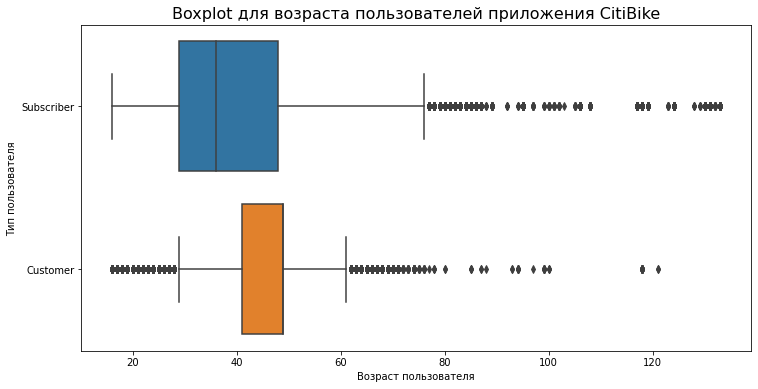

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')